# Part 1. Data Wrangling:

This capstone looks at tweets from a 5-year period of the CEOS of several companies. Their respective stocks are collected and the tweets are analyzed to determine if the closing price of a stock can be determined from the CEO's tweets. The CEOs, their twitter username, and their associated stocks are as follows:  
 - Elon Musk : '@elonmusk': Tesla (TSLA)
 - Aaron Levie : '@levie': Box (BOX)
 - Jack Dorsey : '@jack': Twitter (TWTR)
 - Marc Benioff : '@Benioff': Salesforce (CRM)
 - Richard Branson: @richardbranson: Virgin Galactic (SPCE)
 - John Legere: @JohnLegere: T-Mobile (TMUS)
 
 
These CEOs were selected with the following criteria:  
 - the stock must be a publicly traded company for at least 5 years.
 - the CEO must have tweeted at least 500 times over that span of that 5 years.
 


## Objective: 

To scrape the tweets and stocks from the CEOS, clean these data by standardizing dates and times, dealing with null values, and then to combine these cleaned dataframes into a single dataframe for EDA and machine learning. All datetimes are in EST.

In [303]:
from utils import *

# Collecting Data

## Collecting Stocks 

In [304]:
# Import 5-year daily tesla stocks from Yahoo Finance and store in dataframe

#tsla = yf.Ticker('TSLA')
#box = yf.Ticker('BOX')
#twtr = yf.Ticker('TWTR')
#crm = yf.Ticker('CRM')
#spce = yf.Ticker('SPCE')
#tmus = yf.Ticker('TMUS')



# Convert to dataframes
#tsla_df = tsla.history(period = '5y')
#box_df = box.history(period = '5y')
#twtr_df = twtr.history(period = '5y')
#crm_df = crm.history(period = '5y')
#spce_df = spce.history(period='5y')
#tmus_df = tmus.history(period='5y')



stock_names = ['TSLA','BOX', 'TWTR','CRM','SPCE', 'TMUS']
stocks = {}
for stock in stock_names:
    stocks[stock] = pd.read_pickle(f'data/{stock}.pkl')

In [305]:
# Examine stocks
#stocks = { 'TSLA': tsla_df, 'BOX': box_df, 'TWTR': twtr_df, 'CRM':crm_df, 'SPCE': spce_df, 'TMUS':tmus_df}

for stock in stocks:
    print("===============")
    print(stock)
    print("===============")
    print(stocks[stock].info())
    print('\nFirst Row:')
    print(stocks[stock].head(1))
  
    stocks[stock].to_pickle(f'./data/{stock}.pkl')

TSLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Volume        1259 non-null   int64         
 6   Dividends     1259 non-null   int64         
 7   Stock Splits  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 78.8 KB
None

First Row:
        Date       Open       High        Low      Close    Volume  Dividends  \
0 2016-08-23  44.863998  45.698002  44.560001  44.967999  23922000          0   

   Stock Splits  
0           0.0  
BOX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 col

### 1.2.2 Combining the Stocks <a id='1.2.2_Combining_Stocks'></a>

In [306]:
# Get needed columns and change the date to lowercase

for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    stocks[stock] =  stocks[stock][['Date','Open', 'Close']]
    stocks[stock].columns = stocks[stock].columns.str.lower()

In [307]:
for stock in stocks:
    print(stock.upper())
    print("=======================")
    print(stocks[stock][stocks[stock]['date'] == stocks[stock]['date']].min())
    print(stocks[stock][stocks[stock]['date'] == stocks[stock]['date']].max())
    print("")

TSLA
date     2016-08-23 00:00:00
open               36.220001
close              35.793999
dtype: object
date     2021-08-23 00:00:00
open              891.380005
close             883.090027
dtype: object

BOX
date     2016-08-23 00:00:00
open                    8.75
close                   9.12
dtype: object
date     2021-08-23 00:00:00
open                   29.25
close                  29.01
dtype: object

TWTR
date     2016-08-23 00:00:00
open                    14.3
close                  14.29
dtype: object
date     2021-08-23 00:00:00
open               78.360001
close              77.629997
dtype: object

CRM
date     2016-08-23 00:00:00
open               66.589996
close              68.410004
dtype: object
date     2021-08-23 00:00:00
open              283.470001
close                 281.25
dtype: object

SPCE
date     2017-09-29 00:00:00
open                    7.19
close                   7.22
dtype: object
date     2021-08-23 00:00:00
open                   58.59
close 

In [308]:
stocks

{'TSLA':            date        open       close
 0    2016-08-23   44.863998   44.967999
 1    2016-08-24   45.410000   44.523998
 2    2016-08-25   44.622002   44.192001
 3    2016-08-26   44.428001   43.998001
 4    2016-08-29   44.029999   43.040001
 ...         ...         ...         ...
 1254 2021-08-17  672.659973  665.710022
 1255 2021-08-18  669.750000  688.989990
 1256 2021-08-19  678.210022  673.469971
 1257 2021-08-20  682.849976  680.260010
 1258 2021-08-23  685.442017  703.700012
 
 [1259 rows x 3 columns],
 'BOX':            date       open      close
 0    2016-08-23  12.950000  13.300000
 1    2016-08-24  13.400000  13.070000
 2    2016-08-25  13.050000  13.140000
 3    2016-08-26  13.170000  13.050000
 4    2016-08-29  13.050000  13.290000
 ...         ...        ...        ...
 1254 2021-08-17  25.100000  24.510000
 1255 2021-08-18  24.620001  25.040001
 1256 2021-08-19  24.930000  24.629999
 1257 2021-08-20  24.600000  24.870001
 1258 2021-08-23  25.110001  25.4400

Our goal is to predict stock changes based off twitter data that occurs before the next opening or closing price. To get the data into a workable format, I will need to combine the opening and closing stock prices and sort them by date and time.

In [309]:
def organize_stocks(stock): #Here

        # Instatiate Open and Close
        stock_open = stock[['date','open']]
        stock_close = stock[['date','close']]

        # Convert dates to datetime objects
        stock_open['date'] = pd.to_datetime(stock_open['date'])
        stock_close['date'] = pd.to_datetime(stock_close['date'])

        # Convert datetimes into datetime string format
        stock_open['date'] = stock_open['date'].dt.strftime('%Y-%m-%d 09:30:00')
        stock_close['date'] = stock_close['date'].dt.strftime('%Y-%m-%d 16:00:00')

        # Convert strings back into datetime objects
        stock_open['date'] = pd.to_datetime(stock_open['date'])
        stock_close['date'] = pd.to_datetime(stock_close['date'])

        # Get earliest and latest stock price dates to create a date index
        stock_open['price'] = stock_open['open']
        stock_open.drop('open', axis=1, inplace=True)

        stock_close['price'] = stock_close['close']
        stock_close.drop('close', axis=1, inplace=True)

        start_date_open = dt.strftime(stock_open.reset_index().date.min(), '%Y-%m-%d %H:%M:%S')
        end_date_open = dt.strftime(stock_open.reset_index().date.max(), '%Y-%m-%d %H:%M:%S')

        start_date_close = dt.strftime(stock_close.reset_index().date.min(), '%Y-%m-%d %H:%M:%S')
        end_date_close = dt.strftime(stock_close.reset_index().date.max(), '%Y-%m-%d %H:%M:%S')

        date_indx_open = pd.date_range(start_date_open, end_date_open).tolist()
        date_indx_close = pd.date_range(start_date_close, end_date_close).tolist()
        date_indx_open = pd.Series(date_indx_open, name='date')
        date_indx_close = pd.Series(date_indx_close, name='date')

        # Merge date index onto stock dataframes
        stock_open = pd.merge(date_indx_open, stock_open, how='left')
        stock_close = pd.merge(date_indx_close, stock_close, how='left')

        # Interpolate missing values
        #stock_open['price'].interpolate(method='linear', inplace=True)
        #stock_close['price'].interpolate(method='linear', inplace=True)
        
        # MAKE SURE YOU CAN UNDERSTAND THIS

        # Reset index and join open and close dataframes together
        stock_open.set_index('date', inplace=True)
        stock_close.set_index('date', inplace=True)

        stock = pd.concat([stock_open, stock_close])
        
        stock.sort_index(inplace=True)
        
        return stock

In [310]:
for stock in stocks:
    stocks[stock] = organize_stocks(stocks[stock])

### 1.2.3 Examine Collected Stocks <a id='1.2.3_Examine_Stocks'></a>

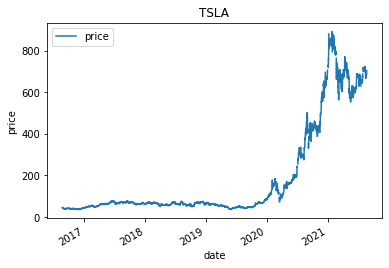

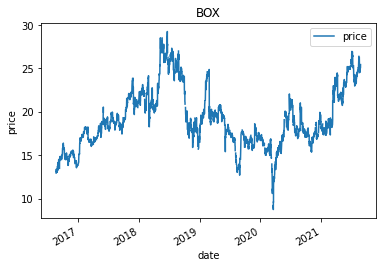

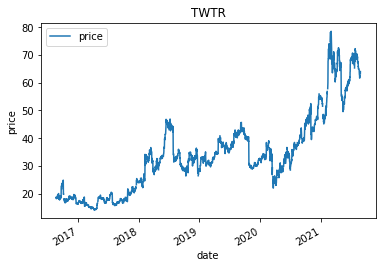

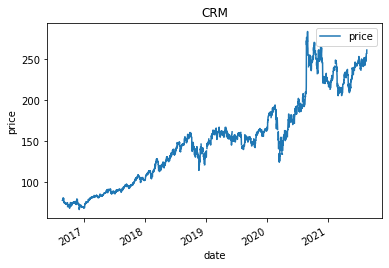

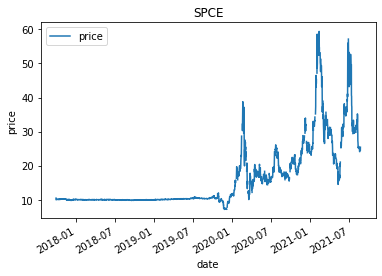

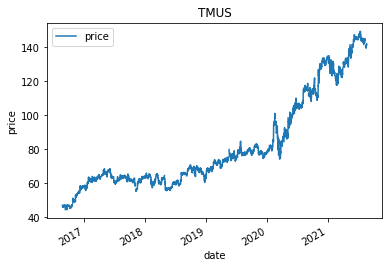

In [311]:
for stock in stocks:
    stocks[stock].plot()
    plt.xlabel('date', color='black')
    plt.ylabel('price', color='black')
    plt.title(stock, color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.savefig('./figures/data_wrangling/stocks_{}.png'.format(stock), bbox_inches='tight', tranparent=True)
    plt.show()
    
    

In [312]:
for stock in stocks:
    print(stocks[stock].isna())

                     price
date                      
2016-08-23 09:30:00  False
2016-08-23 16:00:00  False
2016-08-24 09:30:00  False
2016-08-24 16:00:00  False
2016-08-25 09:30:00  False
...                    ...
2021-08-21 16:00:00   True
2021-08-22 09:30:00   True
2021-08-22 16:00:00   True
2021-08-23 09:30:00  False
2021-08-23 16:00:00  False

[3654 rows x 1 columns]
                     price
date                      
2016-08-23 09:30:00  False
2016-08-23 16:00:00  False
2016-08-24 09:30:00  False
2016-08-24 16:00:00  False
2016-08-25 09:30:00  False
...                    ...
2021-08-21 16:00:00   True
2021-08-22 09:30:00   True
2021-08-22 16:00:00   True
2021-08-23 09:30:00  False
2021-08-23 16:00:00  False

[3654 rows x 1 columns]
                     price
date                      
2016-08-23 09:30:00  False
2016-08-23 16:00:00  False
2016-08-24 09:30:00  False
2016-08-24 16:00:00  False
2016-08-25 09:30:00  False
...                    ...
2021-08-21 16:00:00   True
2021-

In [313]:
for stock in stocks:
    print(stock)
    print(stocks[stock].info())

TSLA
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2518 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
BOX
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2518 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
TWTR
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2518 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
CRM
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:0

All of the stocks have the same number of values with the exception of Virgin Galactic, which has been on the NYSE for less than the 5 year max alloted by yfinance. No missing numbers are detected.

### De-trending the time series stock data 

We will use the percent change in the stock prices as a target that we will later bin into categories.  

In [314]:
for stock in stocks:
    stocks[stock]['percent change'] = stocks[stock]['price'].pct_change()
    stocks[stock].fillna(0, inplace=True)

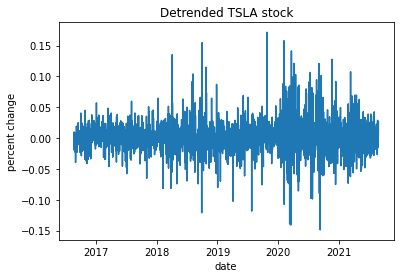

In [315]:
_ = plt.plot(stocks['TSLA'][['percent change']])
_ = plt.xlabel('date')
_ = plt.ylabel('percent change')
_ = plt.title('Detrended TSLA stock')
plt.savefig('./figures/data_wrangling/detrended_stock.png', bbox_inches='tight')

In [316]:
#for stock in stocks:
#    stocks[stock].to_pickle(f'./data/{stock}_df.pkl')

## 1.2.5 Collecting the tweets <a id='1.2.5_Collecting_Tweet'></a>
We will collect the CEOs tweets over the same time-span as the collected stocks

In [317]:
# Get the tweets from the CEOs of the companies
# Get user_ids in case of name changes. 

        
user_stocks = {'elonmusk':'TSLA', 'levie':'BOX','jack':'TWTR', 'Benioff':'CRM', 
            'richardbranson':'SPCE', 'JohnLegere':'TMUS'}

In [318]:
#start_date = {}
#for user in user_stocks:
#    start_date[user] = dt.strftime(stocks[user_stocks[user]].reset_index().date.min(), '%Y-%m-%d %H:%M:%S')

In [319]:
usernames = list(user_stocks.keys())

In [320]:
#%%time

#ceos = []
#for user in usernames:
#    c = twint.Config()
#    c.Username = user
#    c.User_full = True
#    c.Count = True
#    c.Stats = True
#    c.Pandas = True
#    c.Store_pandas = True
#    c.Hide_output = True
#    c.Pandas_clean = True
#    c.Since = start_date[user]

    # run search
#    twint.run.Search(c)

# extract columns and save dataframe in list
#columns = twint.output.panda.Tweets_df.columns
#ceo = twint.output.panda.Tweets_df[columns]
#ceos.append(ceo)


ceos = pd.read_pickle('./data/ceos.pkl')
usernames = ['elonmusk', 'levie', 'jack', 'Benioff','richardbranson', 'JohnLegere']

In [321]:
ceos.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search
0,1417453075892080641,1417427520266268677,2021-07-20 07:55:22 EDT,2021-07-20,07:55:22,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'vincent13031925', 'name': 'Vincent Yu', 'id': '1689516060'}]",,,,,None
1,1417390555001098246,1417251070989029376,2021-07-20 03:46:56 EDT,2021-07-20,03:46:56,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'blueorigin', 'name': 'Blue Origin', 'id': '235348644'}]",,,,,None
2,1417293886897098762,1417278493428264963,2021-07-19 21:22:49 EDT,2021-07-19,21:22:49,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'SpacePadreIsle', 'name': 'SPadre', 'id': '1083699592699543552'}, {'screen_name': 'SpaceX', 'name': 'SpaceX', 'id': '34743251'}]",,,,,None
3,1417277335863140363,1417277092090191884,2021-07-19 20:17:03 EDT,2021-07-19,20:17:03,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'TLPN_Official', 'name': 'TheLaunchPad', 'id': '1343611083416694785'}, {'screen_name': 'SpaceX', 'name': 'SpaceX', 'id': '34743251'}]",,,,,None
4,1417274819461095432,1417274819461095432,2021-07-19 20:07:03 EDT,2021-07-19,20:07:03,-0400,44196397,elonmusk,Elon Musk,,...,,,,,[],,,,,None


In [322]:
len(ceos.columns)

37

Lets look at the number of tweets and the dates they span for each executive.

In [323]:
CEOS = {}
for user in usernames:
    CEOS[user] = ceos[ceos['username'] == user]   

In [324]:
start_date = {}
end_date = {}
for CEO in CEOS:
    print(CEO.upper())
    print('number of tweets:', len(CEOS[CEO]))
    print('date range:')
    start_date[CEO] = CEOS[CEO]['date'].min()
    end_date[CEO] = CEOS[CEO]['date'].max()
    print(start_date[CEO], '---' ,end_date[CEO])
    print("")

ELONMUSK
number of tweets: 11622
date range:
2016-07-20 --- 2021-07-20

LEVIE
number of tweets: 1736
date range:
2016-07-21 --- 2021-07-20

JACK
number of tweets: 5124
date range:
2016-07-21 --- 2021-07-20

BENIOFF
number of tweets: 4871
date range:
2016-07-20 --- 2021-05-28

RICHARDBRANSON
number of tweets: 7711
date range:
2017-09-29 --- 2021-07-20

JOHNLEGERE
number of tweets: 37302
date range:
2016-07-20 --- 2021-07-20



In [127]:
#all_tweets = pd.DataFrame()
#for CEO in CEOS:
#    all_tweets = all_tweets.append(CEOS[CEO])
    
#all_tweets.to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/ceos.pkl')

## Examing and Cleaning the Data 

### Examining The Tweets 

In [128]:
# Examine the scraped data

for CEO in CEOS:
    print("================")
    print(CEO)
    print("================")
    print(CEOS[CEO][['date','tweet']].head(3))

elonmusk
         date                               tweet
0  2021-07-20     @vincent13031925 Great to hear!
1  2021-07-20  @blueorigin Best of luck tomorrow!
2  2021-07-19        @SpacePadreIsle @SpaceX Haha
levie
         date  \
0  2021-07-20   
1  2021-07-20   
2  2021-07-20   

                                                                                                                                                                                                                                                                   tweet  
0                                                                                                                                                                                                                            This is a very sad take on entrepreneurship  
1  Space innovation from many ventures is just plain win-win-win. More funding of research that will lead to unexpected discoveries, more rocket scientists, more knowledge about the 

The raw twitter data has mentions, urls, emojis, and other languages besides english at first glance. 

In [148]:
CEOS['elonmusk'].loc[3883]

id                                                     1256239815256797184
conversation_id                                        1256239815256797184
created_at                                         2020-05-01 11:11:26 EDT
date                                                            2020-05-01
time                                                              11:11:26
timezone                                                             -0400
user_id                                                           44196397
username                                                          elonmusk
name                                                             Elon Musk
place                                                                     
tweet                                    Tesla stock price is too high imo
language                                                                en
mentions                                                                []
urls                     

In [25]:
# Examine the tweet columns

CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11622 entries, 0 to 11621
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               11622 non-null  object
 1   conversation_id  11622 non-null  object
 2   created_at       11622 non-null  object
 3   date             11622 non-null  object
 4   time             11622 non-null  object
 5   timezone         11622 non-null  object
 6   user_id          11622 non-null  int64 
 7   username         11622 non-null  object
 8   name             11622 non-null  object
 9   place            11622 non-null  object
 10  tweet            11622 non-null  object
 11  language         11622 non-null  object
 12  mentions         11622 non-null  object
 13  urls             11622 non-null  object
 14  photos           11622 non-null  object
 15  replies_count    11622 non-null  int64 
 16  retweets_count   11622 non-null  int64 
 17  likes_count      11622 non-null

Looking at the dataframe columns entries, there are no missing values. That may be because they are using a different character than NaN, and I will look into this later. Most are of type object, but there are 4 integer columns: user_id; reply, retweet, and like counts; and video for some odd reason; and 1 boolean retweet column. All of the columns are the same type. Let's examine the columns.

In [26]:
# Look at sample integer columns

CEOS['elonmusk'].select_dtypes(include=['int']).describe()

,user_id,replies_count,retweets_count,likes_count,video
count,11622.0,11622.000000,11622.000000,1.162200e+04,11622.000000
mean,44196397.0,985.211065,2602.205989,2.602342e+04,0.060833
std,0.0,3843.169195,10442.067297,7.333076e+04,0.239034
min,44196397.0,0.000000,0.000000,9.100000e+01,0.000000
25%,44196397.0,55.000000,49.000000,1.204000e+03,0.000000
50%,44196397.0,143.500000,163.000000,3.655500e+03,0.000000
75%,44196397.0,534.750000,984.000000,1.542325e+04,0.000000
max,44196397.0,126196.000000,355536.000000,1.574723e+06,1.000000


The video column looks like a boolean

In [27]:
CEOS['elonmusk']['video'].nunique()

2

In [28]:
CEOS['elonmusk']['video'].sum()

707

In [29]:
# Look at first set of object columns

CEOS['elonmusk'].select_dtypes(include=['object']).describe()

,id,conversation_id,created_at,date,time,timezone,username,name,place,tweet,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search
count,11622,11622,11622,11622,11622,11622,11622,11622,11622,11622,...,11622,11622,11622,11622,11622,11622,11622,11622,11622,11622
unique,11622,5665,11619,1465,10736,1,1,1,1,11554,...,1,1,1,1,5620,1,1,1,1,1
top,1417453075892080641,828280866451374085,2018-04-01 18:02:31 EDT,2017-03-24,15:39:16,-0400,elonmusk,Elon Musk,,@flcnhvy True,...,,,,,[],,,,,None
freq,1,34,2,49,4,11622,11622,11622,11622,6,...,11622,11622,11622,11622,2967,11622,11622,11622,11622,11622


A lot of these columns I will exclude as they likely won't contribute any contributable features to predicting the stock price. I will determine the language after cleaning the tweets.

In [30]:
CEOS['elonmusk'][['tweet', 'mentions', 'urls', 'photos','hashtags', 'cashtags', 'quote_url']].describe()

,tweet,mentions,urls,photos,hashtags,cashtags,quote_url
count,11622,11622,11622,11622,11622,11622,11622
unique,11554,137,746,640,17,2,382
top,@flcnhvy True,[],[],[],[],[],
freq,6,11357,10812,10983,11604,11621,11231


The missing values are represented by empty lists. Let's turn this into a better represenation of missing values.

Let's look at the languages first.

In [31]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts()[:5])

ELONMUSK
en     10105
und     1123
tl       123
fr        38
de        36
Name: language, dtype: int64
LEVIE
en     1677
und      44
fr        5
es        3
it        2
Name: language, dtype: int64
JACK
en     4041
und     983
es       18
fr       15
in       11
Name: language, dtype: int64
BENIOFF
en     4696
und     117
fr       17
pt        9
es        7
Name: language, dtype: int64
RICHARDBRANSON
en     7652
und      48
fr        3
tl        3
ro        2
Name: language, dtype: int64
JOHNLEGERE
en     28752
und     8207
pt       152
es        55
fr        33
Name: language, dtype: int64


Let's see what und is

In [32]:
CEOS['elonmusk']['tweet'][CEOS['elonmusk']['language'] == 'und']

15                                  @waitbutwhy Pohtaytohz
28                                 https://t.co/d4ZOSKZESP
31       @JeffTutorials @TonyTesla4Life @WholeMarsBlog Yes
44                    @AaronS5_ @FrenchieEAP @karpathy Yes
53                                      @Kristennetten Yup
                               ...                        
11505                                    @huntster1701 yes
11506                                      @DavidKYoon yes
11540                                 @asunshinegreene yes
11605                              https://t.co/Kgkz1Z3FwJ
11616                                         @vitiral yup
Name: tweet, Length: 1123, dtype: object

It looks like und occurs when there are a lot of mentions, links, or emojis, so I will keep this and clean them later. 

In [33]:
# Keep the en and und languages 
for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][(CEOS[CEO]['language'] == 'en') | (CEOS[CEO]['language'] == 'und')]
    CEOS[CEO].reset_index(inplace=True, drop=True)

In [34]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts())
    print(CEOS[CEO]['language'].value_counts().sum())

ELONMUSK
en     10105
und     1123
Name: language, dtype: int64
11228
LEVIE
en     1677
und      44
Name: language, dtype: int64
1721
JACK
en     4041
und     983
Name: language, dtype: int64
5024
BENIOFF
en     4696
und     117
Name: language, dtype: int64
4813
RICHARDBRANSON
en     7652
und      48
Name: language, dtype: int64
7700
JOHNLEGERE
en     28752
und     8207
Name: language, dtype: int64
36959


### 1.3.2 Converting to Missing Values and Categorical Features <a id='1.3.2_Missing'></a>

In [35]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].head(3))

ELONMUSK
  mentions urls photos hashtags cashtags thumbnail
0       []   []     []       []       []          
1       []   []     []       []       []          
2       []   []     []       []       []          
LEVIE
  mentions urls                                             photos hashtags  \
0       []   []                                                 []       []   
1       []   []                                                 []       []   
2       []   []  [https://pbs.twimg.com/media/E6vgkwJUcAIUI5z.jpg]       []   

  cashtags                                        thumbnail  
0       []                                                   
1       []                                                   
2       []  https://pbs.twimg.com/media/E6vgkwJUcAIUI5z.jpg  
JACK
  mentions                                  urls  \
0       []  [https://squareup.com/us/en/banking]   
1       []                                    []   
2       []        [https://youtu.be/VcjzHMhBtf0]   

  

In [36]:
# Convert empty lists into NaNs for easier processing
for CEO in CEOS:
    CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']] = CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags','cashtags', 'thumbnail']].applymap(lambda x: np.nan if len(x) == 0 else x)
    

In [37]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].info())

ELONMUSK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11228 entries, 0 to 11227
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mentions   259 non-null    object 
 1   urls       775 non-null    object 
 2   photos     607 non-null    object 
 3   hashtags   18 non-null     object 
 4   cashtags   0 non-null      float64
 5   thumbnail  672 non-null    object 
dtypes: float64(1), object(5)
memory usage: 526.4+ KB
None
LEVIE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mentions   81 non-null     object
 1   urls       165 non-null    object
 2   photos     135 non-null    object
 3   hashtags   12 non-null     object
 4   cashtags   2 non-null      object
 5   thumbnail  148 non-null    object
dtypes: object(6)
memory usage: 80.8+ KB
None
JACK
<class 'pandas.core.frame.Dat

In [38]:
for CEO in CEOS:
    print(CEO.upper())
    print('\n')
    print('missing values')
    print('===============')
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].isna().sum())
    print('\n')

ELONMUSK


missing values
mentions     10969
urls         10453
photos       10621
hashtags     11210
cashtags     11228
thumbnail    10556
dtype: int64


LEVIE


missing values
mentions     1640
urls         1556
photos       1586
hashtags     1709
cashtags     1719
thumbnail    1573
dtype: int64


JACK


missing values
mentions     4295
urls         3900
photos       4562
hashtags     4614
cashtags     5019
thumbnail    4554
dtype: int64


BENIOFF


missing values
mentions     2446
urls         2201
photos       3162
hashtags     4484
cashtags     4813
thumbnail    2787
dtype: int64


RICHARDBRANSON


missing values
mentions     4300
urls         1369
photos       2240
hashtags     4958
cashtags     7700
thumbnail    1767
dtype: int64


JOHNLEGERE


missing values
mentions     29409
urls         29580
photos       27902
hashtags     27771
cashtags     36737
thumbnail    27019
dtype: int64




In [39]:
categ = ['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']
for categorical in categ:
    print(categorical.upper())
    print(CEOS['JohnLegere'][categorical][~CEOS['JohnLegere'][categorical].isna()])
    print('===========')

MENTIONS
6        [{'screen_name': 'lifehacker', 'name': 'lifeha...
18       [{'screen_name': 'neilbarua', 'name': 'neil ba...
20       [{'screen_name': 'candace_parker', 'name': 'ca...
29       [{'screen_name': 'coolcatsnft', 'name': 'cool ...
43       [{'screen_name': 'richardbranson', 'name': 'ri...
                               ...                        
36951    [{'screen_name': 'theorlandojones', 'name': 'o...
36952    [{'screen_name': 'tmobile', 'name': 't-mobile'...
36954    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
36956    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
36957    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
Name: mentions, Length: 7550, dtype: object
URLS
0        [https://www.buzzfeed.com/juliawilling/milo-an...
1        [https://www.theverge.com/2021/7/19/22580542/j...
3        [https://mashable.com/article/nasa-hubble-imag...
5        [https://www.buzzfeed.com/hannahloewentheil/pe...
6        [https://lifehacker.com/youve-probably-been-pi..

In [40]:
%%time
# Change categoricals to binary values
for CEO in CEOS:
    for categorical in categ:
        CEOS[CEO][categorical][CEOS[CEO][categorical].isnull()] = 0

for CEO in CEOS:
    for categorical in categ:
        for i in range(len(CEOS[CEO])):
            if CEOS[CEO][categorical].iloc[i] != 0:
                if categorical != 'thumbnail':
                    CEOS[CEO][categorical].iloc[i] = len(CEOS[CEO][categorical].iloc[i])
                else:
                    CEOS[CEO]['thumbnail'].iloc[i] = 1

CPU times: user 42.1 s, sys: 476 ms, total: 42.6 s
Wall time: 45.1 s


In [41]:
for CEO in CEOS:
    CEOS[CEO]['cashtags'] = CEOS[CEO]['cashtags'].astype(int)

In [42]:
for CEO in CEOS:
    print(CEO.upper())
    for categorical in categ:
        print(CEOS[CEO][categorical].value_counts())
        print('============')

ELONMUSK
0    10969
1      230
2       25
3        2
4        2
Name: mentions, dtype: int64
0    10453
1      765
2        9
3        1
Name: urls, dtype: int64
0    10621
1      571
2       23
3       11
4        2
Name: photos, dtype: int64
0    11210
1       17
2        1
Name: hashtags, dtype: int64
0    11228
Name: cashtags, dtype: int64
0    10556
1      672
Name: thumbnail, dtype: int64
LEVIE
0    1640
1      64
2      15
3       2
Name: mentions, dtype: int64
0    1556
1     164
2       1
Name: urls, dtype: int64
0    1586
1     127
2       6
4       2
Name: photos, dtype: int64
0    1709
1      12
Name: hashtags, dtype: int64
0    1719
1       2
Name: cashtags, dtype: int64
0    1573
1     148
Name: thumbnail, dtype: int64
JACK
0    4295
1     571
2     118
3      30
4       8
8       1
9       1
Name: mentions, dtype: int64
0    3900
1    1113
2      11
Name: urls, dtype: int64
0    4562
1     411
2      25
4      16
3      10
Name: photos, dtype: int64
0    4614
1     386
2

### 1.3.3 Select Feature Columns and Combine Tweets for Each Day <a id='1.3.3_Features'></a>

I will be keeping most of the categorical and int features, but I won't be keeping the Cashtag column as it is empty for most of the tweets

In [43]:
# Set appropriate columns 

for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][[
        'date', 'time', 'username', 'tweet', 
        'mentions', 'hashtags', 'video', 'photos', 'urls']]

In [44]:
# Need to change some of the features to integers
for CEO in CEOS:
    CEOS[CEO].fillna(0, inplace=True)

I will make a separate dataframe for these and append them to a dataframe of tweets that have been grouped by the date. Because I am looking how tweets impact the stock prices, I want to analyze tweets that happen before the price point. To this end I will be looking at the closing price, and tweets that occur on the same day after the market closes will be counted towards the following day. 

In [45]:
num_tweets = len(CEOS['elonmusk'])

In [46]:
num_tweets

11228

In [47]:
%%time 
# Takes ~1 min
for CEO in CEOS:
    CEOS[CEO] = combine_tweets(CEOS[CEO])

CPU times: user 58.5 s, sys: 653 ms, total: 59.2 s
Wall time: 1min 1s


In [48]:
assert num_tweets == CEOS['elonmusk']['number of tweets'].sum()

In [49]:
for CEO in CEOS:
    print(CEO.upper())
    print('Number of days collected: {}'.format(CEOS[CEO].shape[0]))
    print("")

ELONMUSK
Number of days collected: 2179

LEVIE
Number of days collected: 957

JACK
Number of days collected: 1476

BENIOFF
Number of days collected: 1868

RICHARDBRANSON
Number of days collected: 2009

JOHNLEGERE
Number of days collected: 3415



## 1.4 Combining Stocks and Tweets DataFrames <a id='1.4_Combining_DataFrames'></a>

In [50]:
# merge stocks on to tweets
for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    print(stock.upper)
    print(stocks[stock].head(3))
    print("")

<built-in method upper of str object at 0x7fd79348dab0>
                 date      price  percent change
0 2016-08-23 09:30:00  44.863998        0.000000
1 2016-08-23 16:00:00  44.967999        0.002318
2 2016-08-24 09:30:00  45.410000        0.009829

<built-in method upper of str object at 0x7fd794a9c470>
                 date  price  percent change
0 2016-08-23 09:30:00  12.95        0.000000
1 2016-08-23 16:00:00  13.30        0.027027
2 2016-08-24 09:30:00  13.40        0.007519

<built-in method upper of str object at 0x7fd76a865770>
                 date      price  percent change
0 2016-08-23 09:30:00  18.650000        0.000000
1 2016-08-23 16:00:00  18.690001        0.002145
2 2016-08-24 09:30:00  18.799999        0.005885

<built-in method upper of str object at 0x7fd79348da30>
                 date      price  percent change
0 2016-08-23 09:30:00  77.820000        0.000000
1 2016-08-23 16:00:00  78.019997        0.002570
2 2016-08-24 09:30:00  78.000000       -0.000256

<bui

In [51]:
CEOS_list = list(CEOS.keys())
stocks_list = list(stocks.keys())

In [52]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]] = CEOS[CEOS_list[i]].merge(stocks[stocks_list[i]], how='left', on='date')
    CEOS[CEOS_list[i]] = CEOS[CEOS_list[i]].sort_values(by = 'date').reset_index(drop=True)

In [53]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO].head(3))

ELONMUSK
                 date                                              tweet  \
0 2016-07-20 16:00:00  California time Post should go live on Tesla w...   
1 2016-07-21 09:30:00  Autopilot prevents serious injury or death of ...   
2 2016-07-22 09:30:00  Looking forward to the Gigafactory opening par...   

   username  mentions  hashtags  video  photos  urls  number of tweets  price  \
0  elonmusk         0         0      0       0     0                 7    NaN   
1  elonmusk         0         0      1       1     0                 6    NaN   
2  elonmusk         0         0      0       0     0                 1    NaN   

   percent change  
0             NaN  
1             NaN  
2             NaN  
LEVIE
                 date                                              tweet  \
0 2016-07-21 09:30:00  One part of Twitter right now is a mad man tha...   
1 2016-07-21 16:00:00  Ted Cruz deserves kudos. Might be the only per...   
2 2016-07-22 09:30:00  Thiel just delivered the

### 1.4.1 Sort DataFrames and Clean <a id='1.4.1_Sorting_and_Cleaning'></a>

In [54]:
# Combine tweets that occur when market it closed and add to next market open.

for CEO in CEOS:
    CEOS[CEO] = fix_closed_market_tweets(CEOS[CEO])
    CEOS[CEO].reset_index('date', inplace=True)

In [55]:
# Check for missing values
for CEO in CEOS:
    print(CEO)
    print(CEOS[CEO].isna().sum())

elonmusk
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price               0
percent change      0
dtype: int64
levie
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price               0
percent change      0
dtype: int64
jack
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price               0
percent change      0
dtype: int64
Benioff
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price    

Because the latest tweets are before the next market opens, some of them have missing values and I will have to remove them for now.

In [56]:
for CEO in CEOS:
    print(CEOS[CEO].shape)

(1531, 11)
(705, 11)
(1126, 11)
(1376, 11)
(1406, 11)
(2301, 11)


Normalize data types

In [57]:
CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1531 non-null   datetime64[ns]
 1   tweet             1531 non-null   object        
 2   username          1531 non-null   object        
 3   mentions          1531 non-null   int64         
 4   hashtags          1531 non-null   int64         
 5   video             1531 non-null   int64         
 6   photos            1531 non-null   int64         
 7   urls              1531 non-null   int64         
 8   number of tweets  1531 non-null   int64         
 9   price             1531 non-null   float64       
 10  percent change    1531 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 131.7+ KB


In [58]:
ints_columns = CEOS['elonmusk'].select_dtypes(include=['int']).columns
floats_columns = CEOS['elonmusk'].select_dtypes(include=['float']).columns

In [59]:
for CEO in CEOS:
    CEOS[CEO][ints_columns] = CEOS[CEO][ints_columns].astype(int)
    CEOS[CEO][floats_columns] = CEOS[CEO][floats_columns].astype(float)

### 1.4.2 DataFrame Prices vs Original Stock Prices <a id='1.4.2_Looking_at_Original_Stocks'></a>

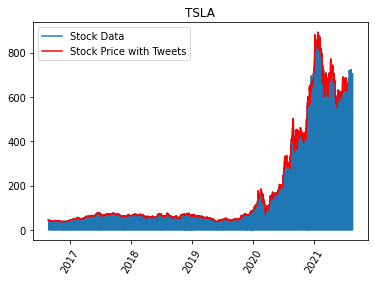

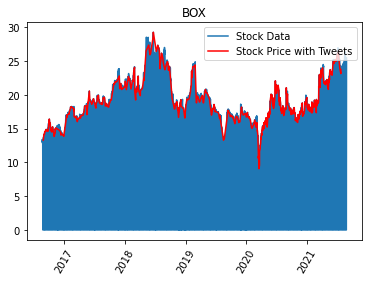

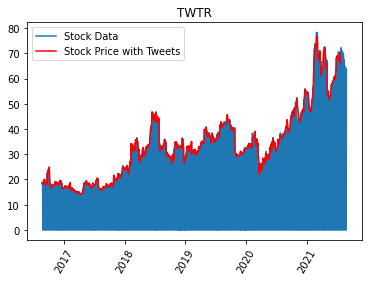

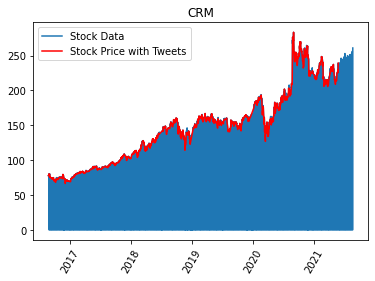

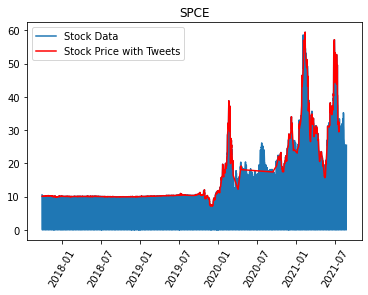

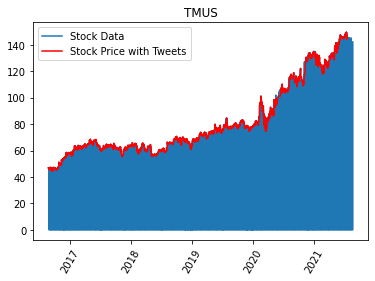

<Figure size 432x288 with 0 Axes>

In [60]:
# Let's look to see how well the full stock prices match the merged tweet and stock DataFrames
for i in range(len(stocks_list)):
    _ = plt.plot(stocks[stocks_list[i]]['date'], stocks[stocks_list[i]]['price'])
    _ = plt.plot(CEOS[CEOS_list[i]]['date'], CEOS[CEOS_list[i]]['price'], c='red')
    _ = plt.title(stocks_list[i])
    _ = plt.xticks(rotation=60)
    _ = plt.legend(['Stock Data', 'Stock Price with Tweets'])
    _ = plt.show()
    plt.savefig('./figures/data_wrangling/Price_Tweets_{}.png'.format(stocks_list[i]), bbox_inches='tight')

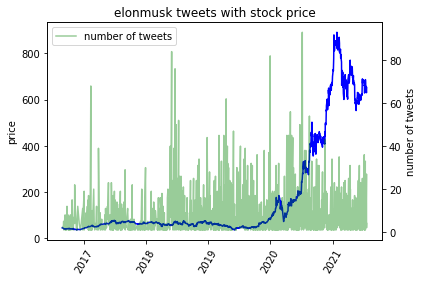

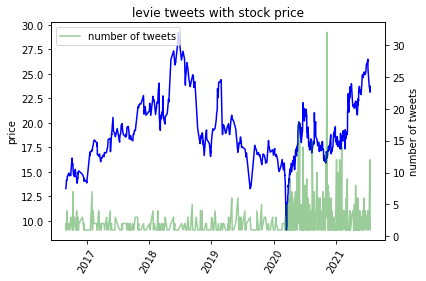

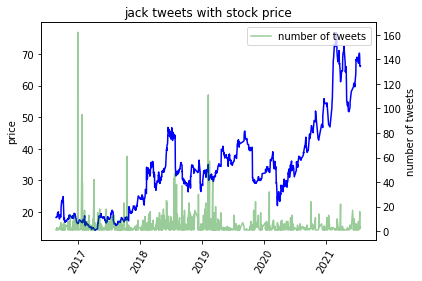

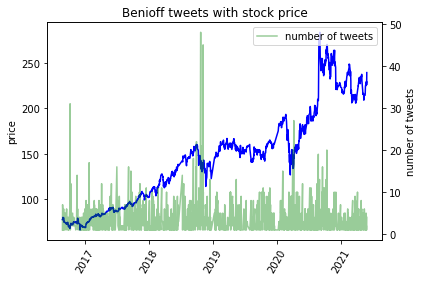

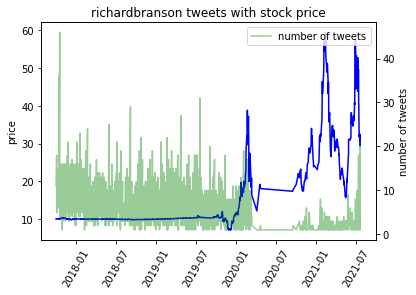

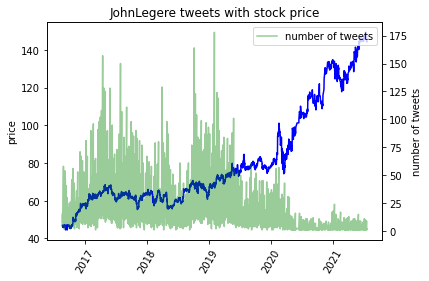

In [61]:
# Initalize a Figure and Axes
for CEO in CEOS:
    fig, ax = plt.subplots()

    ax.plot(CEOS[CEO]['date'], CEOS[CEO]['price'], color='blue')
    plt.ylabel('price')
    plt.title(f'{CEO} tweets with stock price')
    plt.xticks(rotation=60)

    # Create a twin Axes that shares the x-axis
    ax2 = ax.twinx()
    
    ax2.plot(CEOS[CEO]['date'], CEOS[CEO]['number of tweets'], color='g', alpha = 0.4)
    plt.ylabel('number of tweets')
    plt.legend(['number of tweets'])
    plt.savefig('./figures/data_wrangling/num_tweets_stock_price_{}.png'.format(CEO), bbox_inches='tight')
    plt.show()

In [62]:
test = CEOS['JohnLegere']
test2 = CEOS['richardbranson']

In [63]:
test = test[test['date'] <= '2019']
test2 = test2[test2['date'] >= '2020-07']

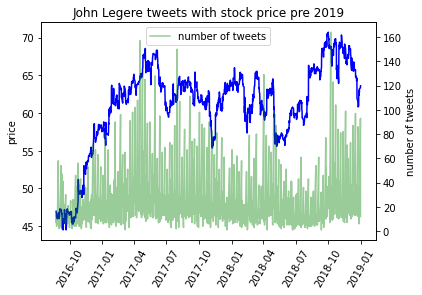

In [64]:
fig, ax = plt.subplots()

ax.plot(test['date'], test['price'], color='blue')
plt.ylabel('price')
plt.title('John Legere tweets with stock price pre 2019')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()


ax2.plot(test['date'], test['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])
plt.savefig('./figures/data_wrangling/num_tweets_stock_price_JohnLegere_pre2019', bbox_inches='tight')
plt.show()

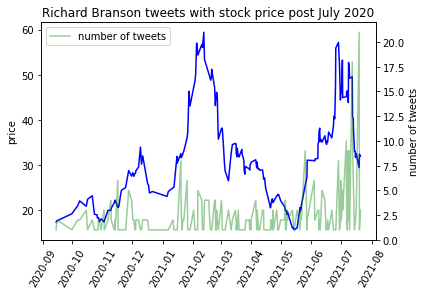

In [65]:
fig, ax = plt.subplots()

ax.plot(test2['date'], test2['price'], color='blue')
plt.ylabel('price')
plt.title('Richard Branson tweets with stock price post July 2020')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

ax2.plot(test2['date'], test2['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])
plt.savefig('./figures/data_wrangling/num_tweets_stock_price_richardbranson_post2020', bbox_inches='tight')
plt.show()

## 1.5 Saving Dataframes <a id='1.5_Exporting_DataFrames'></a>

In [66]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]].to_pickle(f'./data/{CEOS_list[i]}_df.pkl')

In [67]:
tweet_stocks = pd.DataFrame()
for CEO in CEOS:
    tweet_stocks = tweet_stocks.append(CEOS[CEO])

In [68]:
tweet_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 2300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              8445 non-null   datetime64[ns]
 1   tweet             8445 non-null   object        
 2   username          8445 non-null   object        
 3   mentions          8445 non-null   int64         
 4   hashtags          8445 non-null   int64         
 5   video             8445 non-null   int64         
 6   photos            8445 non-null   int64         
 7   urls              8445 non-null   int64         
 8   number of tweets  8445 non-null   int64         
 9   price             8445 non-null   float64       
 10  percent change    8445 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 791.7+ KB


In [69]:
tweet_stocks.to_pickle(f'./data/tweet_stocks.pkl')

***
# Summary

In [283]:
collected_tweets = pd.DataFrame(columns=['Twitter Handle', 'Company Affiliation', 'Number of Tweets', 'Company Ticker', 'Number of Stock Days'], index=['Elon Musk', 'Aaron Levie', 'Jack Dorsey', 'Marc Benioff', 'Richard Branson', 'John Legere'])

In [284]:
collected_tweets.loc[['Elon Musk'], ['Twitter Handle']] =  '@elonmusk'
collected_tweets.loc[['Aaron Levie'], ['Twitter Handle']] =  '@levie'
collected_tweets.loc[['Jack Dorsey'], ['Twitter Handle']] =  '@jack'
collected_tweets.loc[['Marc Benioff'], ['Twitter Handle']] =  '@Benioff'
collected_tweets.loc[['Richard Branson'], ['Twitter Handle']] =  '@richardbranson'
collected_tweets.loc[['John Legere'], ['Twitter Handle']] =  '@JohnLegere'

In [285]:
collected_tweets.loc[['Elon Musk'], ['Company Affiliation']] =  'CEO and product architect of Tesla, Inc.'
collected_tweets.loc[['Aaron Levie'], ['Company Affiliation']] =  'Co-founder of Enterprise Cloud Software Box'
collected_tweets.loc[['Jack Dorsey'], ['Company Affiliation']] =  'CEO of Twitter, Inc.'
collected_tweets.loc[['Marc Benioff'], ['Company Affiliation']] =  'Founder, chairman and CEO, Salesforce'
collected_tweets.loc[['Richard Branson'], ['Company Affiliation']] =  'Founder of Virgin Galactic'
collected_tweets.loc[['John Legere'], ['Company Affiliation']] =  'Former CEO T-Mobile US'

In [286]:
collected_tweets.loc[['Elon Musk'], ['Number of Tweets']] =  11622
collected_tweets.loc[['Aaron Levie'], ['Number of Tweets']] =  1736
collected_tweets.loc[['Jack Dorsey'], ['Number of Tweets']] =  5124
collected_tweets.loc[['Marc Benioff'], ['Number of Tweets']] =  4871
collected_tweets.loc[['Richard Branson'], ['Number of Tweets']] =  7711
collected_tweets.loc[['John Legere'], ['Number of Tweets']] =  37302

In [287]:
collected_tweets.loc[['Elon Musk'], ['Company Ticker']] =  'TSLA'
collected_tweets.loc[['Aaron Levie'], ['Company Ticker']] =  'BOX'
collected_tweets.loc[['Jack Dorsey'], ['Company Ticker']] =  'TWTR'
collected_tweets.loc[['Marc Benioff'], ['Company Ticker']] =  'CRM'
collected_tweets.loc[['Richard Branson'], ['Company Ticker']] =  'SPCE'
collected_tweets.loc[['John Legere'], ['Company Ticker']] =  'TMUS'

In [288]:
collected_tweets.loc[['Elon Musk'], ['Number of Stock Days']] =  1259
collected_tweets.loc[['Aaron Levie'], ['Number of Stock Days']] =  1259
collected_tweets.loc[['Jack Dorsey'], ['Number of Stock Days']] =  1259
collected_tweets.loc[['Marc Benioff'], ['Number of Stock Days']] =  1259
collected_tweets.loc[['Richard Branson'], ['Number of Stock Days']] =  981
collected_tweets.loc[['John Legere'], ['Number of Stock Days']] =  1259

In [290]:
print(collected_tweets.to_markdown())

|                 | Twitter Handle   | Company Affiliation                         |   Number of Tweets | Company Ticker   |   Number of Stock Days |
|:----------------|:-----------------|:--------------------------------------------|-------------------:|:-----------------|-----------------------:|
| Elon Musk       | @elonmusk        | CEO and product architect of Tesla, Inc.    |              11622 | TSLA             |                   1259 |
| Aaron Levie     | @levie           | Co-founder of Enterprise Cloud Software Box |               1736 | BOX              |                   1259 |
| Jack Dorsey     | @jack            | CEO of Twitter, Inc.                        |               5124 | TWTR             |                   1259 |
| Marc Benioff    | @Benioff         | Founder, chairman and CEO, Salesforce       |               4871 | CRM              |                   1259 |
| Richard Branson | @richardbranson  | Founder of Virgin Galactic                  |               7

|                 | Twitter Handle   | Company Affiliation                         |   Number of Tweets | Company Ticker   |   Number of Stock Days |
|:----------------|:-----------------|:--------------------------------------------|-------------------:|:-----------------|-----------------------:|
| Elon Musk       | @elonmusk        | CEO and product architect of Tesla, Inc.    |              11622 | TSLA             |                   1259 |
| Aaron Levie     | @levie           | Co-founder of Enterprise Cloud Software Box |               1736 | BOX              |                   1259 |
| Jack Dorsey     | @jack            | CEO of Twitter, Inc.                        |               5124 | TWTR             |                   1259 |
| Marc Benioff    | @Benioff         | Founder, chairman and CEO, Salesforce       |               4871 | CRM              |                   1259 |
| Richard Branson | @richardbranson  | Founder of Virgin Galactic                  |               7711 | SPCE             |                    981 |
| John Legere     | @JohnLegere      | Former CEO T-Mobile US                      |              37302 | TMUS             |                   1259 |     

### Data Collection

A maximum of 5-years of stock data were collected from Yahoo! finance using **yfinance**. The following tickers and  corresponding stock dates were collected:

- Tesla (TSLA): 1259 
- Box (BOX): 1259
- Twitter (TWTR): 1259
- Salesforce (CRM): 1259
- Virgin Galactic (SPCE): 981
- T-Mobile (TMUS): 1259

All stocks were collected between *August 23rd, 2016* to *July 20th, 2021* with the exception of SPCE where the earliest public stock price is *September 29th, 2017*.

Twitter data were scraped via **twint**. Twint has time restrictions for scraping tweets, so the corresponding stock start dates were used. Company executives were selected with the criteria that each must have at least 1000 tweets over the scraped time, they are or were high-level executives in their company and have a strong public association with their company. The following CEOS were picked using their twitter handles., along with the number of tweets that were scraped:

- Elon Musk : @elonmusk  
     CEO and product architect of Tesla, Inc.
       
        number of tweets: 11622
        date range:
        2016-07-20 --- 2021-07-20

- Aaron Levie : @levie  
    Co-founder of Enterprise Cloud Software Box 
    
        number of tweets: 1736
        date range:
        2016-07-21 --- 2021-07-20

- Jack Dorsey : @jack  
    CEO of Twitter, Inc.

        number of tweets: 5124
        date range:
        2016-07-21 --- 2021-07-20

- Marc Benioff : @Benioff  
    Founder, chairman and CEO, Salesforce

        number of tweets: 4871
        date range:
        2016-07-20 --- 2021-05-28

- Richard Branson: @richardbranson
    Founder of Virgin Galactic
    
        number of tweets: 7711
        date range:
        2017-09-29 --- 2021-07-20

- John Legere: @JohnLegere
    Former CEO T-Mobile US

        number of tweets: 37302
        date range:
        2016-07-20 --- 2021-07-20


Eryk Lewinson's article in Towards Data Science gives a great backgroud as to why it good to use in EDA: 
**Phik (𝜙k) — get familiar with the latest correlation coefficient**


Pearson’s correlation coefficient is a standard approach of measuring correlation between two variables. However, it has some drawbacks[3]:

- It works only with continuous variables
- It only accounts for a linear relationship between variables
- It is sensitive to outliers

𝜙k offers several improvements over Pearson's. The key differentiators of $\phi$k are:

- It is based on several refinements to Pearson’s χ2 (chi-squared) contingency test — a hypothesis test for independence between two (or more) variables
- It works consistently between categorical, ordinal, and interval (continuous) variables
- It captures non-linear dependencies
- It reverts to Pearson’s correlation coefficient in the case of a bivariate normal distribution of the input
- the algorithm contains a built-in noise reduction technique against statistical fluctuations

$\phi$k's a correlation coefficient based on several refinements to Pearson’s hypothesis test of independence of two variables.

Using the coefficient, we can find variable pairs that have (un)expected correlations, and evaluate their statistical significance. We can also interpret the dependencies between each pair of variables.

Emphasis is paid to the proper evaluation of statistical significance of correlations and to the interpretation of variable relationships in a contingency table, in particular in case of low statistics samples.

### Stocks

The open and close stock prices with their dates and times were combined into a single dataframe for each collected stock. The index was reset to a date index spanning the first and last dates of the collected stocks. Dates in which the market was closed were set to NaN. The percent change between each stock price was calculated, which we will use as our dependent feature. 

### Tweets

The tweets were organized into Pandas DataFrames containing 37 features for each pulled tweet. Tweets in languages other than english were removed and the features pertaining to the text in the tweet (e.g. hashtags) were selected. The features were converted from lists to intergers counting feature occurances per tweet. Empty lists were set to 0. 


The tweet and stock dataframes were merged together by date. As we are hypothesizing that tweets will have an impact on the opening or closing stock price, posts were grouped together based off this hypothesis, i.e. tweets that occur between 9:30 am and 4:00 pm on a weekday were grouped into one tweet assuming they would impact that day's closing price. Posts between 4:00 pm the next stock open were grouped together as another tweet. This could mean multiple days could be grouped together as one tweet since number of days between the last closing price and the next opening one varies due to weekends and holidays. The total number of tweets collected per group was added. 

### Final DataFrame

The final dataframe with the collected tweets, tweet features, and associated stock percent changes was saved for further processing. The dataframe contains 8445 rows with 11 features. An example of a row of the dataframe is shown below. 

In [300]:
feature_desc = pd.DataFrame(columns=['Feature Name', 'Description'], index=['date'])

In [302]:
tweet_stocks.shape

(8445, 11)

In [ ]:
feature_desc['Feature Name']

In [299]:
tweet_stocks.sample(1)

,date,tweet,username,mentions,hashtags,video,photos,urls,number of tweets,price,percent change
1650,2019-12-11 16:00:00,"@ItalianPali1 @SievertMike Make one for us! Can you say 3-PEAT?🏆🏆🏆 @TMobile has been awarded ‘Best Place To Work’ by @Glassdoor for the 3rd year in a row!! Did I mention that we’re also the #1 place to work in wireless?? #AreYouWithUs https://t.co/iDGLSWQ5vQ We're at the HALFWAY point of #JollyJohn!! Blast your favorite holiday song with 1️⃣2️⃣ @Samsung Galaxy Ear Buds!! 🎵 To win, tell me what present @BraxtonCarter got in the gift exchange? Follow him and use #JollyJohn in your answer below! https://t.co/onCEmihc2Z",JohnLegere,4,3,1,1,1,3,74.620003,-0.006127
